In [141]:
from scipy import optimize
import scipy as sp
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Generate dataset

In [142]:
def random_cluster(x0, y0, points, scatter):
    X = []
    Y = []
    for i in range(points):
        X.append(random.gauss(x0, scatter))
        Y.append(random.gauss(y0, scatter))
    
    return (X, Y)

In [143]:
x1, y1 = random_cluster(0, 0, 50, 0.8)
x2, y2 = random_cluster(4,1, 50, 0.8)
x3, y3 = random_cluster(2, 4, 50, 0.8)
x4, y4 = random_cluster(3, -4, 50, 0.8)

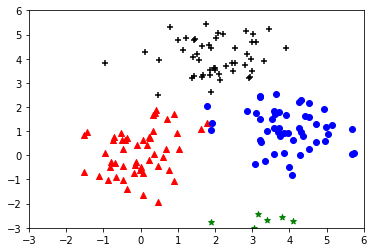

In [144]:
fig, ax = plt.subplots()
ax.scatter(x1, y1, marker='^', color='red')
ax.scatter(x2, y2, marker='o', color='blue')
ax.scatter(x3, y3, marker='+', color='black')
ax.scatter(x4, y4, marker='*', color='green')
ax.set_xlim(-3, 6)
ax.set_ylim(-3, 6)
plt.show()

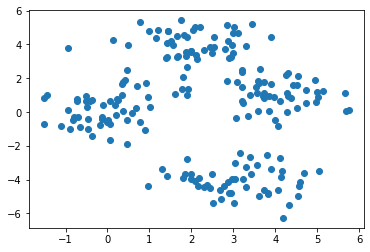

In [145]:
# Combine all points into single dataset

s1 = np.column_stack((x1, y1))
s2 = np.column_stack((x2, y2))
s3 = np.column_stack((x3, y3))
s4 = np.column_stack((x4, y4))

xi = np.row_stack((s1, s2, s3, s4))
plt.scatter(xi[:, 0], xi[:, 1])

# Optimization

In [146]:
def cat_points(centroids, points):
    k = len(centroids)
    dat = {}
    for i in points:
        temp = []
        for j in range(k):
            temp.append(np.linalg.norm(centroids[j]-i)**2)
        
        minArg = np.argmin(temp)
        if minArg in dat.keys():
            dat[minArg].append(i)
        else:
            dat[minArg] = [i]

    
    return dat

def cal_centeroid(cent_points):

    centeroids = []
    for i in cent_points.values():
        i = np.array(i)
        centeroids.append(sum(i)/len(i))
    
    return np.array(centeroids)


In [147]:
k = 4                                       # number of categories to classify
initial_centeroid = np.random.random((k, 2))*6 - 3

In [148]:
cat_points(initial_centeroid, xi).keys()

dict_keys([1, 2, 0, 3])

In [149]:
a = cat_points(initial_centeroid, xi)
b = cal_centeroid(a)
epochs = 100
a_centeroid_path = []
for i in range(epochs):
    a_centeroid_path.append(b[0])
    a = cat_points(b, xi)
    b = cal_centeroid(a)
    

print(b)

[[-0.00561823  0.14653597]
 [ 4.02829926  1.06926467]
 [ 1.98791709  4.03127536]
 [ 3.10352714 -4.08268433]]


In [150]:
a_centeroid_path = np.array(a_centeroid_path)

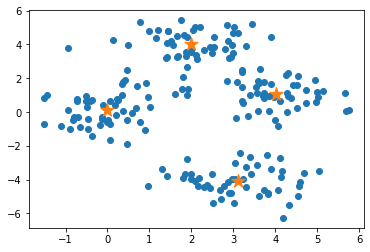

In [151]:
plt.scatter(xi[:, 0], xi[:, 1])
plt.scatter(b[:, 0], b[:, 1], marker="*", s=200)
#plt.plot(a_centeroid_path[:, 1], a_centeroid_path[:, 1], color='green')